# Visualizations


## Set SQL environment

In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import pyodbc
import matplotlib.pyplot as plt


#Set the environment to get the table from the databse in SQL Server

# Defining our connection variables
driver = 'FreeTDS'
server = 'localhost'  # change this to your db’s IP address
port = '1433'
database = 'Suicide_Project' # change this to the name of your db
username = 'sa' # replace with your username
password = '' # replace with your password
version  = '7.3'

#Create string to connect
mssql_string = 'DRIVER={'+driver+'};SERVER='+server+';PORT='+port+';DATABASE='+database+';UID='+username+';PWD='+password+';TDS_Version='+version+';'

conn = pyodbc.connect(mssql_string)

engine = create_engine('mssql+pyodbc://{}:{}@{}:{}/{}?driver={}'.format(username, password, server, port, database, driver))


## Query and Clean the dataframe to show the suicide rate by age group

In [3]:
suicide_rate = pd.read_sql_query(
    '''SELECT  Location, Dim2, FactValueNumeric
    FROM suicide_data
    WHERE Period = '2019' AND Dim1 = 'Both sexes' ''', 
con=engine)

#Get all age groups
age_groups = suicide_rate['Dim2'].drop_duplicates()

#Sort them from youngest to oldest and make a list
age_groups = age_groups.sort_values().tolist()

#Create container dataframe
suicide_age = pd.DataFrame(columns = ['Age Group','Median Suicide Rate'])

#Append the suicide rate by age group
for age in age_groups :

    if isinstance(age,str):
        series = suicide_rate.loc[suicide_rate['Dim2'] == age, 'FactValueNumeric']
        age = age.replace(' years', '')
        mean = series.median()
        row = pd.Series([age,mean], index=suicide_age.columns)
        suicide_age = suicide_age.append(row, ignore_index=True)
    else:
        series = suicide_rate.loc[suicide_rate['Dim2'].isnull() , 'FactValueNumeric']
        age = 'All'
        mean = series.median()
        row = pd.Series([age,mean], index=suicide_age.columns)
        suicide_age = suicide_age.append(row, ignore_index=True)
        


## Create graph

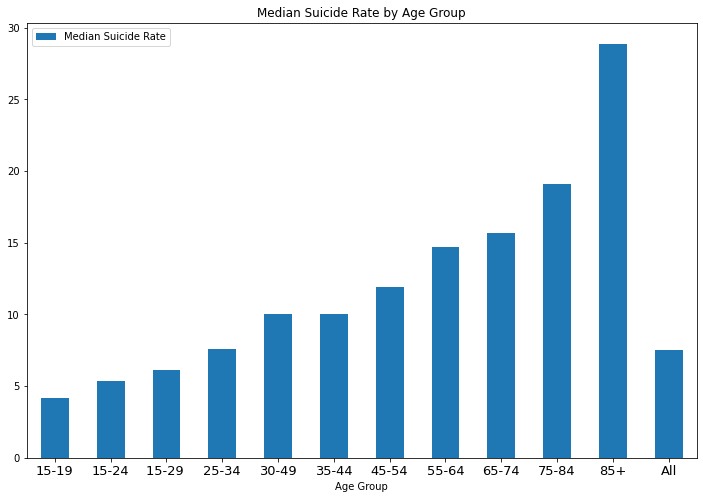

In [4]:
ax = suicide_age.plot.bar(x='Age Group', y='Median Suicide Rate', rot=0, figsize=[12,8])

ax.set_title('Median Suicide Rate by Age Group')

plt.xticks(fontsize = 13)

plt.show()

## Query and Clean the dataframe to show the suicide rate by age group

In [5]:
suicide_rate = pd.read_sql_query(
    '''SELECT  Location, Dim1, FactValueNumeric
    FROM suicide_data
    WHERE Period = '2019' AND Dim2 IS NULL ''', 
con=engine)

#Get all sexes
sex = suicide_rate['Dim1'].drop_duplicates()
#Sort them from youngest to oldest and make a list
sex = sex.sort_values().tolist()

#Create container dataframe
suicide_sex = pd.DataFrame(columns = ['Sex','Median Suicide Rate'])

#Append the suicide rate by sex
for gender in sex :
        series = suicide_rate.loc[suicide_rate['Dim1'] == gender, 'FactValueNumeric']
        median = series.median()
        row = pd.Series([gender,median], index=suicide_sex.columns)
        suicide_sex = suicide_sex.append(row, ignore_index=True)

## Create Graph

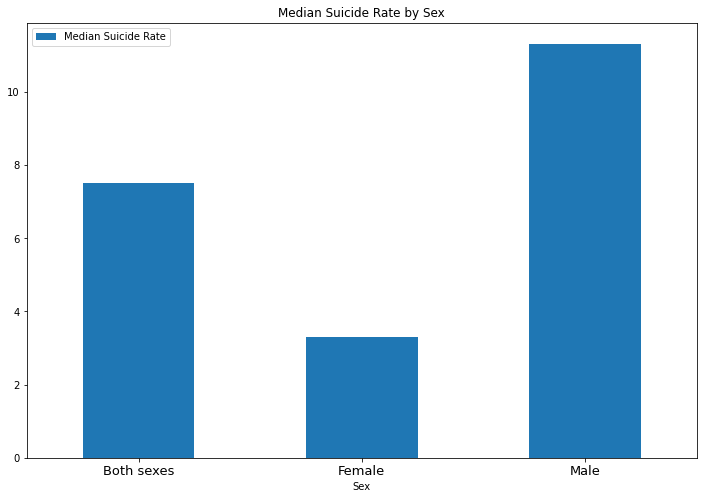

In [6]:
ax = suicide_sex.plot.bar(x='Sex', y='Median Suicide Rate', rot=0, figsize=[12,8])

ax.set_title('Median Suicide Rate by Sex')

plt.xticks(fontsize = 13)

plt.show()

## Query and Clean the dataframe to show the suicide rate by Year

In [7]:
suicide_rate = pd.read_sql_query(
    '''SELECT  Location, Period, FactValueNumeric
    FROM suicide_data
    WHERE Dim1 = 'Both Sexes' AND Dim2 IS NULL ''', 
con=engine)

#Get all sexes
years = suicide_rate['Period'].drop_duplicates()

#Sort them from youngest to oldest and make a list
years = years.sort_values().tolist()


#Create container dataframe
suicide_years = pd.DataFrame(columns = ['Year','Median Suicide Rate'])

#Append the suicide rate by sex
for year in years :
        series = suicide_rate.loc[suicide_rate['Period'] == year, 'FactValueNumeric']
        median = series.median()
        row = pd.Series([year,median], index=suicide_years.columns)
        suicide_years = suicide_years.append(row, ignore_index=True)

suicide_years['Year'] = suicide_years['Year'].astype(str)

## Create Graph

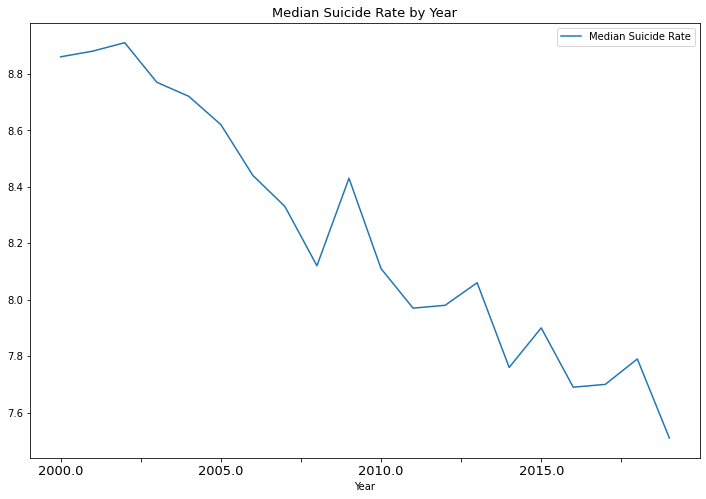

In [20]:
# Plot a simple line chart without any feature
ax = suicide_years.plot(x='Year', y='Median Suicide Rate', rot=0, figsize=[12,8])

ax.set_title('Median Suicide Rate by Year', fontsize = 13)

plt.xticks(fontsize = 13)

plt.show()